In [21]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [33]:
#Constant parameters
data_dir  = './data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

df = pd.read_parquet(os.path.join(data_dir, agg_file))
trend_df = pd.read_csv(os.path.join(data_dir, trend_file))

# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    df[col] = df[col].replace('', 0).astype(int)

In [39]:
def create_trend_line(tmp_df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    tmp_df.groupby(['date'])[[col]].sum().plot(ax=ax, marker='o')

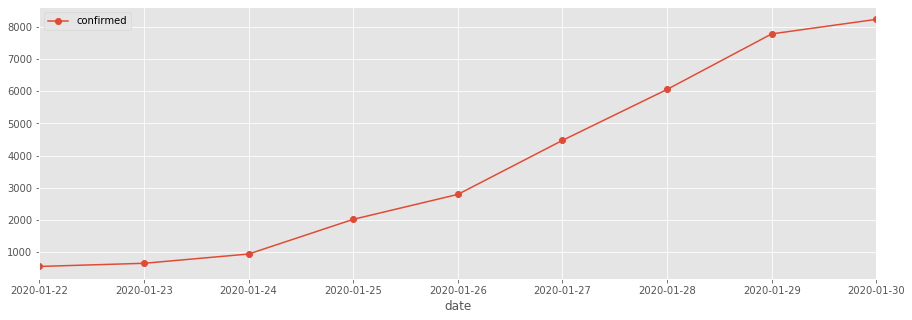

In [40]:
create_trend_line(df, 'confirmed')

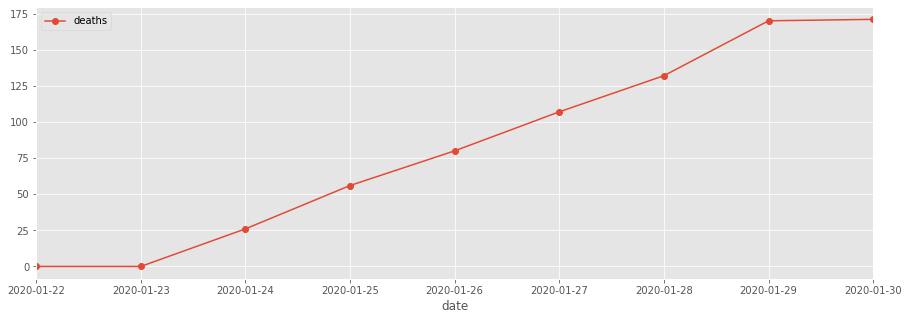

In [41]:
create_trend_line(df, 'deaths')

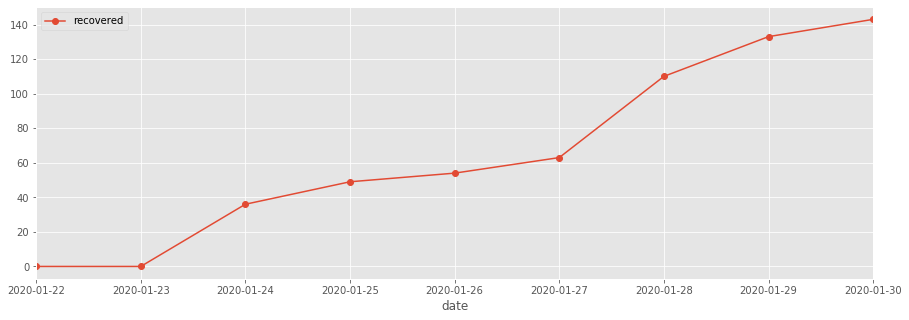

In [42]:
create_trend_line(df, 'recovered')

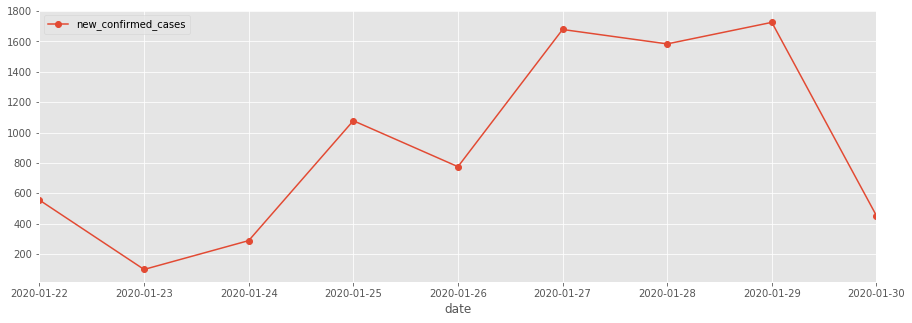

In [43]:
create_trend_line(trend_df, 'new_confirmed_cases')

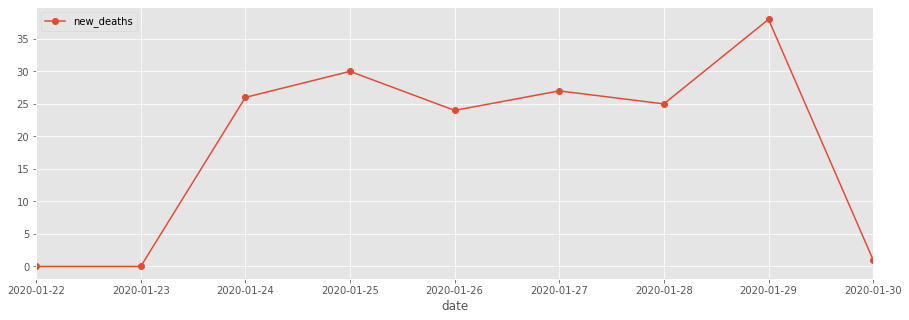

In [44]:
create_trend_line(trend_df, 'new_deaths')

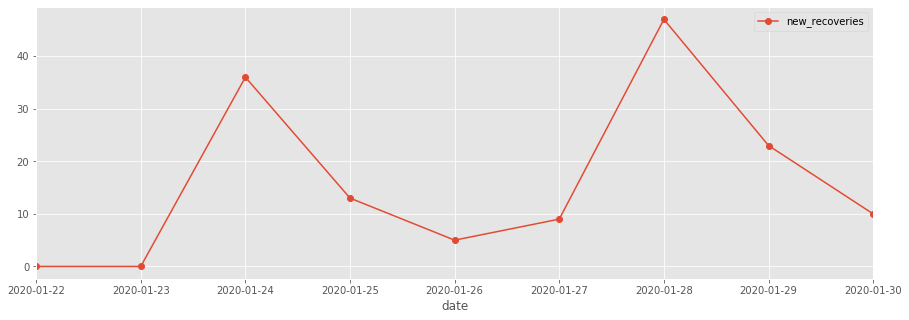

In [45]:
create_trend_line(trend_df, 'new_recoveries')